# Spectral

This notebook illustrates the spectral embedding of a graph through the [spectral decomposition](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html#module-sknetwork.embedding) of the Laplacian matrix. 

In [1]:
%matplotlib inline
import numpy as np

import networkx as nx
import sknetwork as skn

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/types/containers.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [27]:
COLORS = ['r', 'b', 'g']

## Undirected graphs

**Loading**

In [20]:
adjacency, labels = skn.data.karate_club(return_labels=True)

**Embedding**

In [3]:
spectral = skn.embedding.Spectral()
embedding = spectral.fit_transform(adjacency)
embedding.shape

(34, 2)

**Visualization**

In [4]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


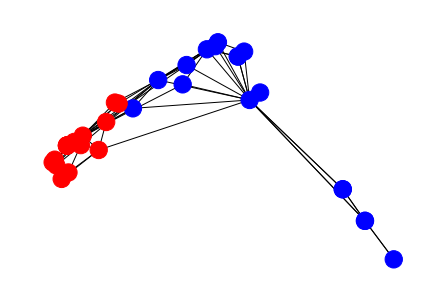

In [6]:
nx.draw(graph, pos=embedding, node_color=[COLORS[l] for l in labels])

**Predict**

In [7]:
# find the embedding of a new node
adjacency_vector = np.zeros(adjacency.shape[0], dtype = int)
adjacency_vector[:5] = np.ones(5, dtype = int)

In [9]:
embedding_vector = spectral.predict(adjacency_vector)

In [11]:
n = adjacency.shape[0]
new_edges = [(n,i) for i in adjacency_vector if adjacency_vector[i]]

In [12]:
graph.add_edges_from(new_edges)

In [14]:
new_embedding = np.vstack((embedding, embedding_vector))

In [24]:
new_labels = list(labels) + [2]

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


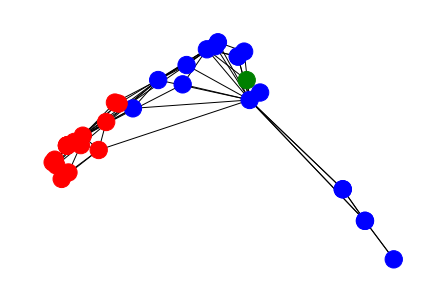

In [28]:
nx.draw(graph, pos=new_embedding, node_color=[COLORS[l] for l in new_labels])

**Metrics**

In [7]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.3509425159474502

**Parameters**

In [9]:
# embedding dimension
spectral = skn.embedding.Spectral(embedding_dimension=10)
spectral.fit(adjacency)

Spectral(embedding_dimension=10, normalized_laplacian=True, regularization=0.01, relative_regularization=True, scaling='multiply', solver=LanczosEig(which='LA'), tol=1e-10)

In [10]:
# regularization
spectral = skn.embedding.Spectral(regularization=1)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=1, relative_regularization=True, scaling='multiply', solver=LanczosEig(which='LA'), tol=1e-10)

In [11]:
# regular Laplacian
spectral = skn.embedding.Spectral(normalized_laplacian=False, scaling=None)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=False, regularization=0.01, relative_regularization=True, scaling=None, solver=LanczosEig(which='SM'), tol=1e-10)

In [12]:
# solver
spectral = skn.embedding.Spectral(solver='halko')
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, scaling='multiply', solver=HalkoEig(which='LA', n_oversamples=10, n_iter='auto', power_iteration_normalizer='auto', one_pass=False), tol=1e-10)

## Directed graphs

**Loading**

In [13]:
adjacency, names = skn.data.painters(return_labels=True)

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Embedding**

In [14]:
# embedding of the graph considered as bipartite (each node considered twice)
bispectral = skn.embedding.BiSpectral()
bispectral.fit(adjacency)

BiSpectral(embedding_dimension=2, weights='degree', col_weights='degree', regularization=0.01, relative_regularization=True, scaling='multiply', solver=LanczosSVD())

In [15]:
embedding = bispectral.row_embedding_
embedding.shape

(14, 2)

**Visualization**

In [16]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


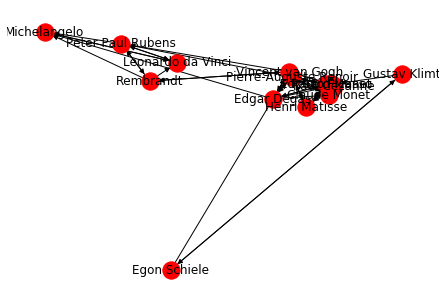

In [17]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos=embedding, node_color='r', labels=names)

**Metrics**

In [18]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.13483601189680694

## Bipartite graphs

**Loading**

In [19]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Embedding**

In [20]:
bispectral = skn.embedding.BiSpectral()
bispectral.fit(biadjacency)

BiSpectral(embedding_dimension=2, weights='degree', col_weights='degree', regularization=0.01, relative_regularization=True, scaling='multiply', solver=LanczosSVD())

In [21]:
row_embedding = bispectral.row_embedding_
row_embedding.shape

(15, 2)

In [22]:
col_embedding = bispectral.col_embedding_
col_embedding.shape

(16, 2)

In [23]:
embedding = bispectral.embedding_
embedding.shape

(31, 2)

**Visualization**



In [24]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [25]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [26]:
n1, n2 = biadjacency.shape
pos = {i: embedding[i, :] for i in range(n1)} 
pos.update({n1 + i: col_embedding[i, :] for i in range(n2)})

In [27]:
colors = n1 * ['r'] + n2 * ['b']

In [28]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

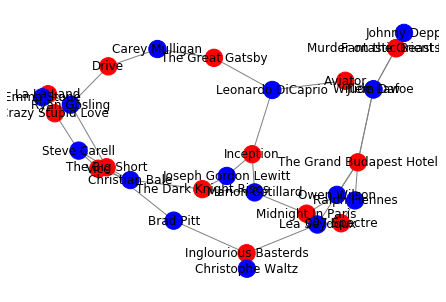

In [29]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=colors, labels=names, edge_color='grey')